<a href="https://colab.research.google.com/github/Neetika23/Machine-Learning/blob/master/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install sklearn

In [5]:
!pip install cross_validation

ERROR: Could not find a version that satisfies the requirement cross_validation (from versions: none)
ERROR: No matching distribution found for cross_validation


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('/content/drive/My Drive/concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


##Simple Cross Validation

In [14]:
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
    # As we saw that prediction with k=1 was the best. so I used k=1 on the test data.
knn = KNeighborsClassifier(1) 
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)  # Predicted on test set.
acc = accuracy_score(y_test, pred, normalize=True) * float(100)  
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 88%

CV accuracy for k = 3 is 85%

CV accuracy for k = 5 is 85%

CV accuracy for k = 7 is 87%

CV accuracy for k = 9 is 87%

CV accuracy for k = 11 is 88%

CV accuracy for k = 13 is 87%

CV accuracy for k = 15 is 84%

CV accuracy for k = 17 is 84%

CV accuracy for k = 19 is 84%

CV accuracy for k = 21 is 80%

CV accuracy for k = 23 is 81%

CV accuracy for k = 25 is 80%

CV accuracy for k = 27 is 80%

CV accuracy for k = 29 is 79%

****Test accuracy for k = 1 is 91%


##10 Fold Cross Validation


The optimal number of neighbors is 1.


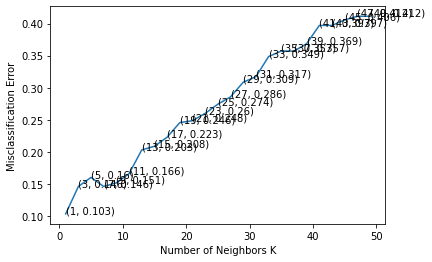

the misclassification error for each k value is :  [0.103 0.146 0.16  0.146 0.151 0.166 0.203 0.208 0.223 0.246 0.248 0.26
 0.274 0.286 0.309 0.317 0.349 0.357 0.357 0.369 0.397 0.397 0.406 0.412
 0.412]


In [16]:
# creating odd list of K for KNN
myList = list(range(0,50))  # creating list of numbers
neighbors = list(filter(lambda x: x % 2 != 0, myList))  # creating neighbors as odd numbers.

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    # It applies 10 fold cv on the training data using knn
    scores = cross_val_score(knn, X_1, y_1, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error = 1-accuracy.
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]  # finding the k with minimum misclassification error.
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [17]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 91.333333%
